## Education attainment
This notebook consists visualization for D7 education level. the dataset is taken from United states census bureau. the link to the raw dataset is https://data.census.gov/table?q=education&g=050XX00US25025

In [9]:
import pandas as pd
import os


In [10]:
combined_data = pd.DataFrame()
# Loop through years from 2012 to 2022
for year in range(2012, 2023):  # Adjust range for file names
    file_name = f"{year}.csv"  # Construct file name for each year
    
    # Check if the file exists
    if os.path.exists(file_name):
        # Read the file
        df = pd.read_csv(file_name)
        
        # Add 'year' column
        df['year'] = year
        
        # Drop columns containing 'Margin of Error' or 'Percent'
        df = df.loc[:, ~df.columns.str.contains('Margin of Error|Percent', case=False)]
        
        # Keep only 'Estimate' columns and the first column (assumed Label)
        df = df.filter(regex='Estimate|Label', axis=1)
        
        # Append to combined DataFrame
        combined_data = pd.concat([combined_data, df], ignore_index=True)
    else:
        print(f"File {file_name} not found.")


In [11]:
print(combined_data.columns)
# Clean up column names
combined_data.columns = combined_data.columns.str.replace(r'.*!!(Total|Male|Female)!!Estimate', r'\1 Estimate', regex=True)
combined_data.columns = combined_data.columns.str.replace(r'\s+', '_', regex=True).str.strip()

# Print updated column names to verify
print(combined_data.columns)


Index(['Label (Grouping)',
       'Census Tract 103, Suffolk County, Massachusetts!!Total!!Estimate',
       'Census Tract 103, Suffolk County, Massachusetts!!Male!!Estimate',
       'Census Tract 103, Suffolk County, Massachusetts!!Female!!Estimate',
       'Census Tract 104.03, Suffolk County, Massachusetts!!Total!!Estimate',
       'Census Tract 104.03, Suffolk County, Massachusetts!!Male!!Estimate',
       'Census Tract 104.03, Suffolk County, Massachusetts!!Female!!Estimate',
       'Census Tract 104.04, Suffolk County, Massachusetts!!Total!!Estimate',
       'Census Tract 104.04, Suffolk County, Massachusetts!!Male!!Estimate',
       'Census Tract 104.04, Suffolk County, Massachusetts!!Female!!Estimate',
       ...
       'Census Tract 1202.01; Suffolk County; Massachusetts!!Female!!Estimate',
       'Census Tract 1203.01; Suffolk County; Massachusetts!!Total!!Estimate',
       'Census Tract 1203.01; Suffolk County; Massachusetts!!Male!!Estimate',
       'Census Tract 1203.01; Su

## Displaying dataset overview

In [12]:
# Keep only necessary columns
relevant_columns = ['Label', 'Total_Estimate', 'Male_Estimate', 'Female_Estimate', 'year']
filtered_data = combined_data.loc[:, combined_data.columns.isin(relevant_columns)]

# Print a sample to verify
print(filtered_data.head())


  Total_Estimate Male_Estimate Female_Estimate Total_Estimate Male_Estimate  \
0          4,370         1,377           2,993            799           528   
1           0.0%          0.0%            0.0%           4.5%          6.8%   
2          17.8%         19.9%           16.9%          15.5%          4.2%   
3          72.0%         65.7%           74.8%          62.6%         69.5%   
4          10.2%         14.4%            8.3%          17.4%         19.5%   

  Female_Estimate Total_Estimate Male_Estimate Female_Estimate Total_Estimate  \
0             271          5,147         2,783           2,364          4,473   
1            0.0%           0.2%          0.3%            0.0%           0.3%   
2           37.6%          17.6%         13.7%           22.1%          15.2%   
3           49.1%          69.3%         71.5%           66.7%          76.0%   
4           13.3%          13.0%         14.5%           11.2%           8.5%   

   ... Female_Estimate Total_Estimate 

In [13]:
# Check the updated column names
print(filtered_data.columns)


Index(['Total_Estimate', 'Male_Estimate', 'Female_Estimate', 'Total_Estimate',
       'Male_Estimate', 'Female_Estimate', 'Total_Estimate', 'Male_Estimate',
       'Female_Estimate', 'Total_Estimate',
       ...
       'Female_Estimate', 'Total_Estimate', 'Male_Estimate', 'Female_Estimate',
       'Total_Estimate', 'Male_Estimate', 'Female_Estimate', 'Total_Estimate',
       'Male_Estimate', 'Female_Estimate'],
      dtype='object', length=270)


In [14]:
# Display a sample of the data
print(combined_data.head())


                              Label_(Grouping) Total_Estimate Male_Estimate  \
0                    Population 18 to 24 years          4,370         1,377   
1               Less than high school graduate           0.0%          0.0%   
2  High school graduate (includes equivalency)          17.8%         19.9%   
3           Some college or associate's degree          72.0%         65.7%   
4                  Bachelor's degree or higher          10.2%         14.4%   

  Female_Estimate Total_Estimate Male_Estimate Female_Estimate Total_Estimate  \
0           2,993            799           528             271          5,147   
1            0.0%           4.5%          6.8%            0.0%           0.2%   
2           16.9%          15.5%          4.2%           37.6%          17.6%   
3           74.8%          62.6%         69.5%           49.1%          69.3%   
4            8.3%          17.4%         19.5%           13.3%          13.0%   

  Male_Estimate Female_Estimate  ... F

In [15]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('Education_data.csv')

# Display the first few rows to understand the structure
data.head(10)


,Unnamed: 0,Year,Label (Grouping),Female Estimate,Females,Male Estimate,Males,Total Estimate
0,5,2013,Population 18 to 24 years,3015.0,NaN,1563.0,NaN,4578.0
1,6,2013,Population 25 to 34 years,126.0,NaN,138.0,NaN,264.0
2,7,2013,Population 25 years and over,164.0,NaN,226.0,NaN,390.0
3,8,2013,Population 35 to 44 years,7.0,NaN,26.0,NaN,33.0
4,9,2013,Population 45 to 64 years,27.0,NaN,53.0,NaN,80.0
5,10,2013,Population 65 years and over,4.0,NaN,9.0,NaN,13.0
6,13,2013,Associate's degree,0.0,NaN,0.0,NaN,0.0
7,35,2014,Population 18 to 24 years,3040.0,NaN,1498.0,NaN,4538.0
8,36,2014,Population 25 to 34 years,162.0,NaN,177.0,NaN,339.0
9,37,2014,Population 25 years and over,241.0,NaN,270.0,NaN,511.0


In [16]:
# Convert relevant columns to numeric
data['Total Estimate'] = pd.to_numeric(data['Total Estimate'], errors='coerce')
data['Male Estimate'] = pd.to_numeric(data['Male Estimate'], errors='coerce')
data['Female Estimate'] = pd.to_numeric(data['Female Estimate'], errors='coerce')

# Handle missing values (optional: drop rows with all estimates missing)
data = data.dropna(subset=['Total Estimate', 'Male Estimate', 'Female Estimate'], how='all')

# Display the cleaned data
data.head(10)


,Unnamed: 0,Year,Label (Grouping),Female Estimate,Females,Male Estimate,Males,Total Estimate
0,5,2013,Population 18 to 24 years,3015.0,NaN,1563.0,NaN,4578.0
1,6,2013,Population 25 to 34 years,126.0,NaN,138.0,NaN,264.0
2,7,2013,Population 25 years and over,164.0,NaN,226.0,NaN,390.0
3,8,2013,Population 35 to 44 years,7.0,NaN,26.0,NaN,33.0
4,9,2013,Population 45 to 64 years,27.0,NaN,53.0,NaN,80.0
5,10,2013,Population 65 years and over,4.0,NaN,9.0,NaN,13.0
6,13,2013,Associate's degree,0.0,NaN,0.0,NaN,0.0
7,35,2014,Population 18 to 24 years,3040.0,NaN,1498.0,NaN,4538.0
8,36,2014,Population 25 to 34 years,162.0,NaN,177.0,NaN,339.0
9,37,2014,Population 25 years and over,241.0,NaN,270.0,NaN,511.0


## Trend Analysis
Plots showing the trend over the years. 

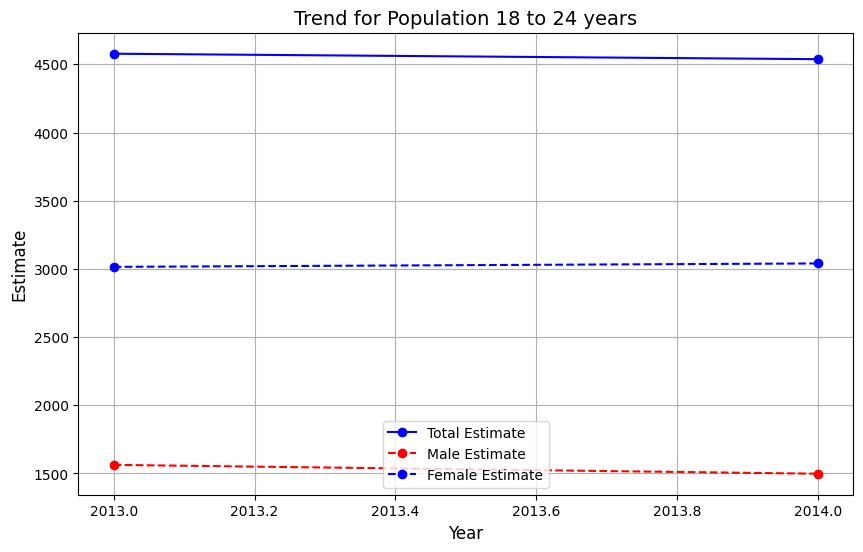

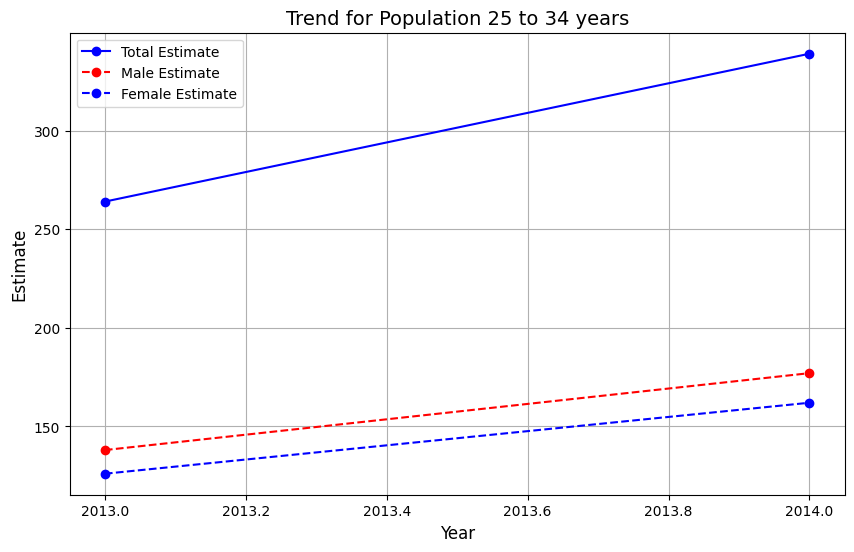

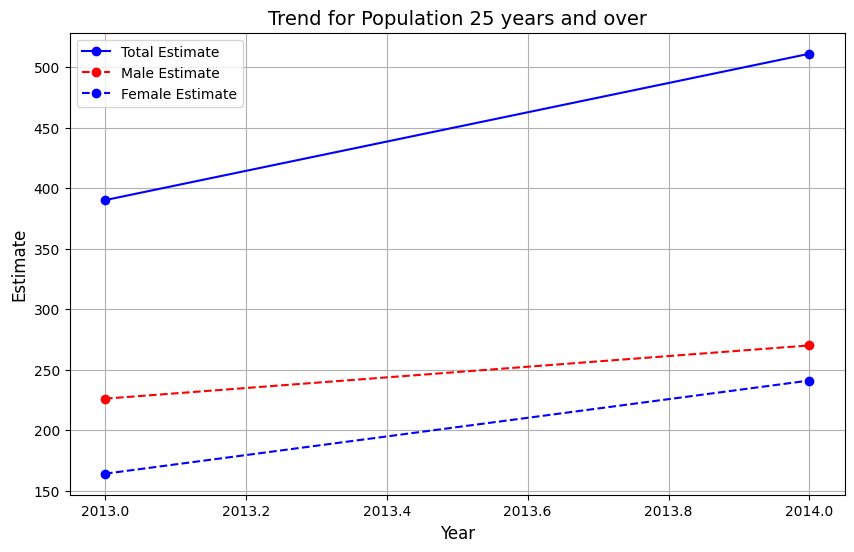

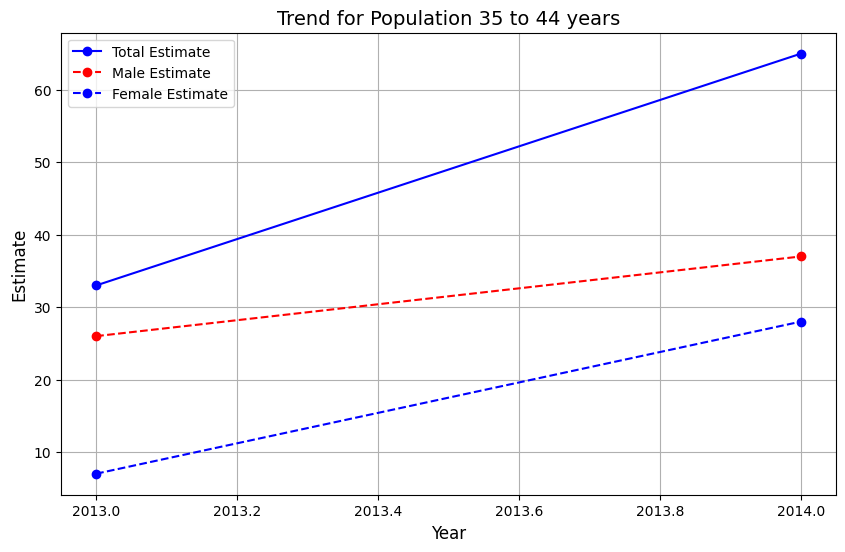

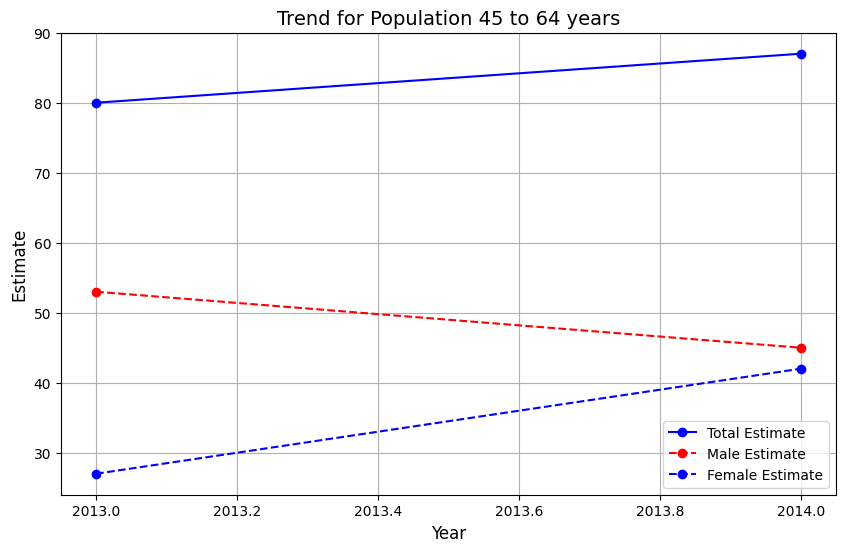

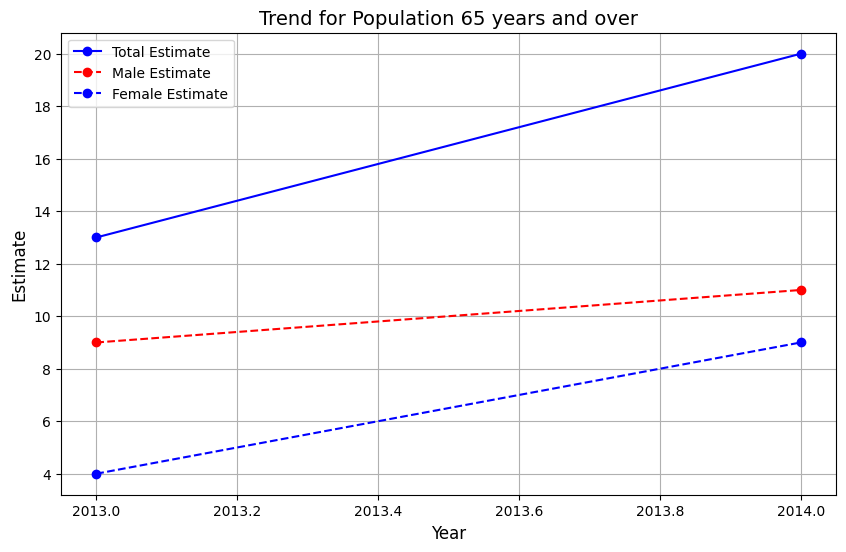

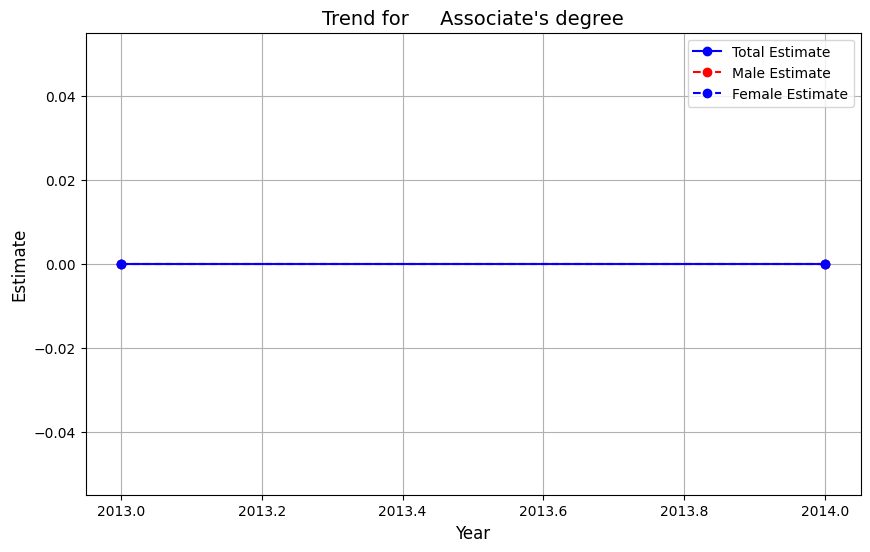

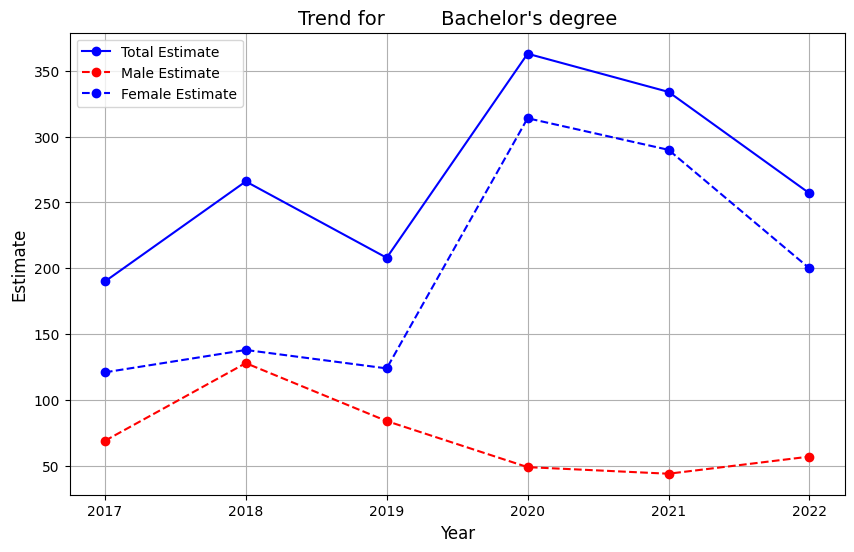

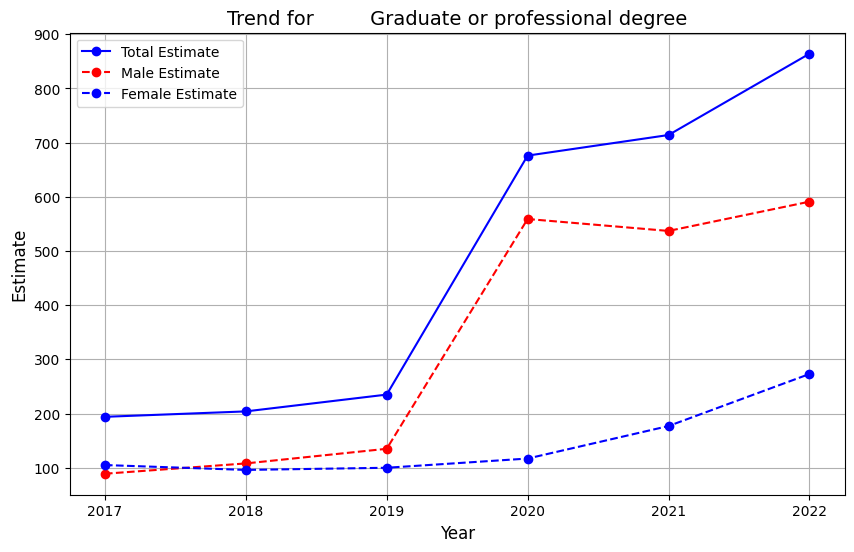

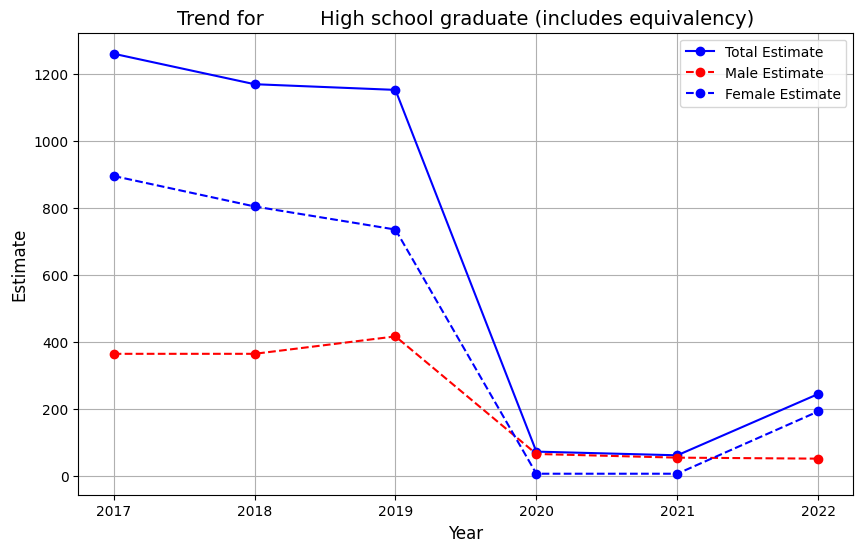

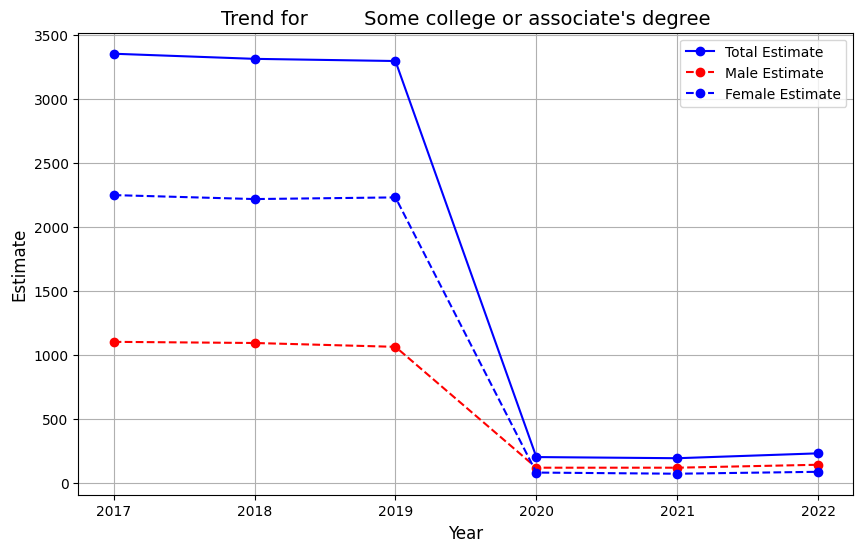

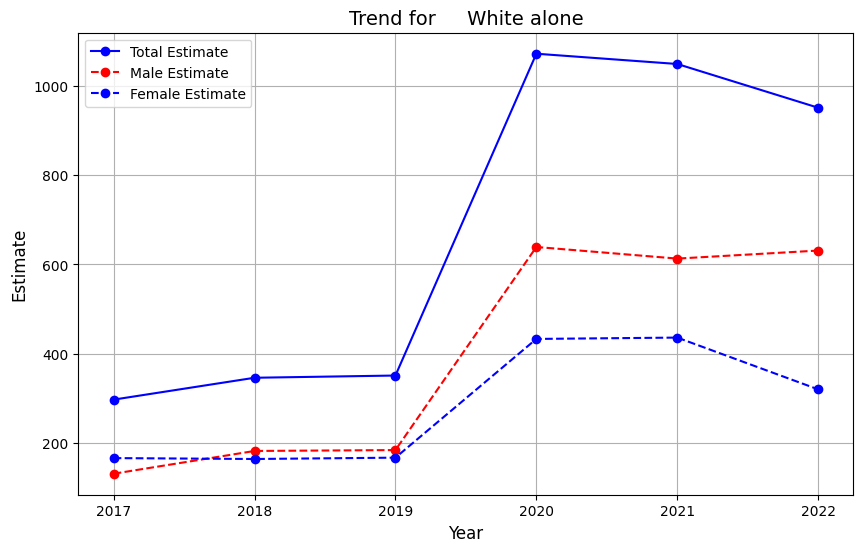

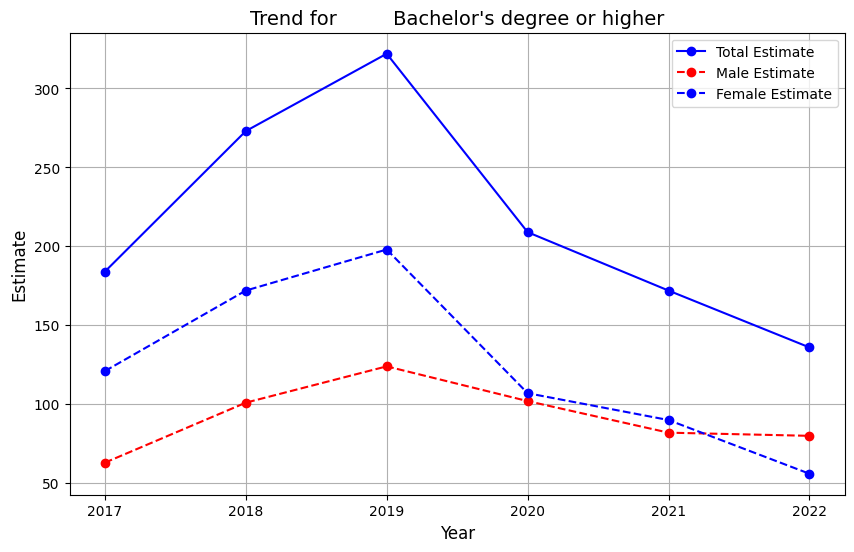

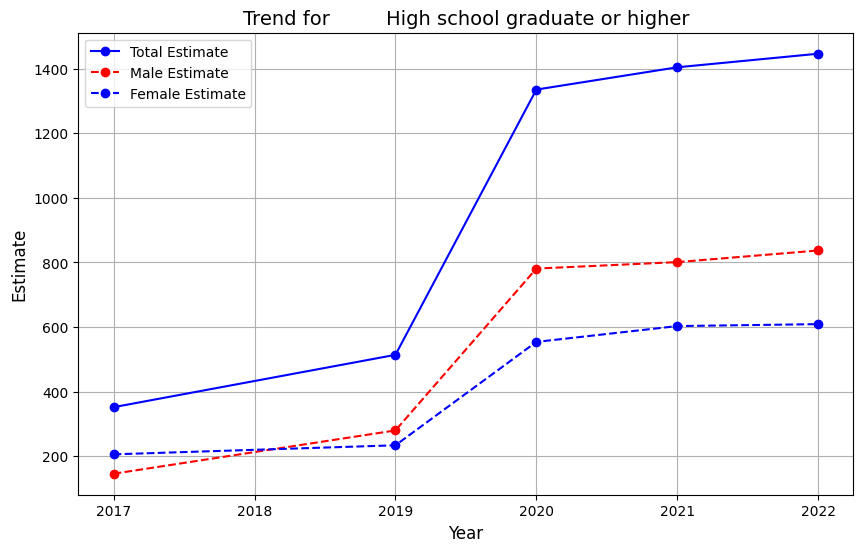

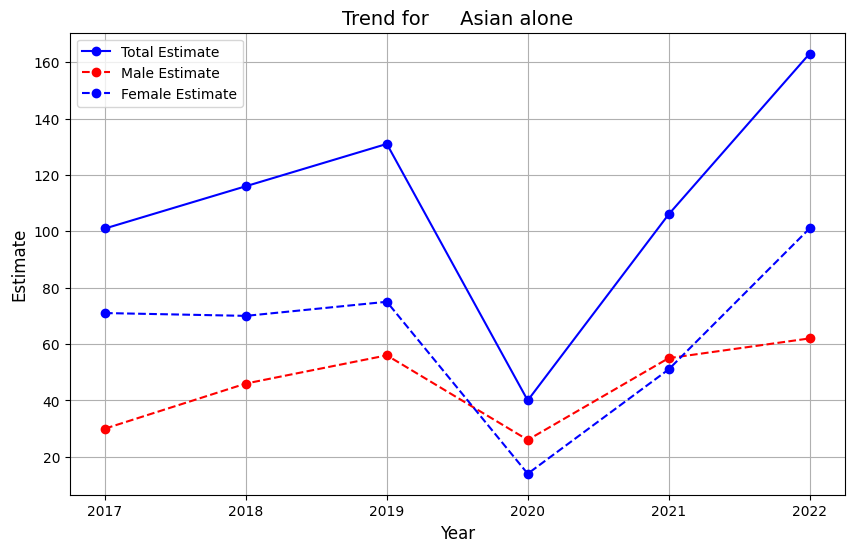

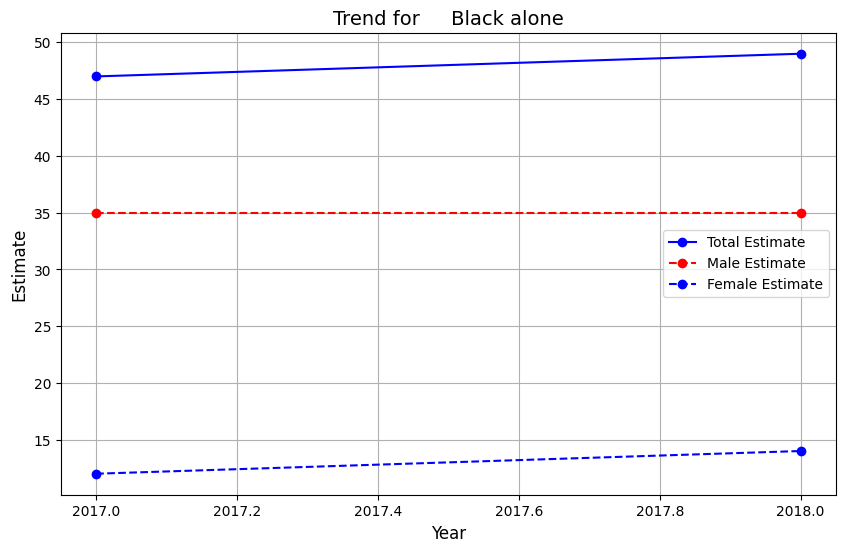

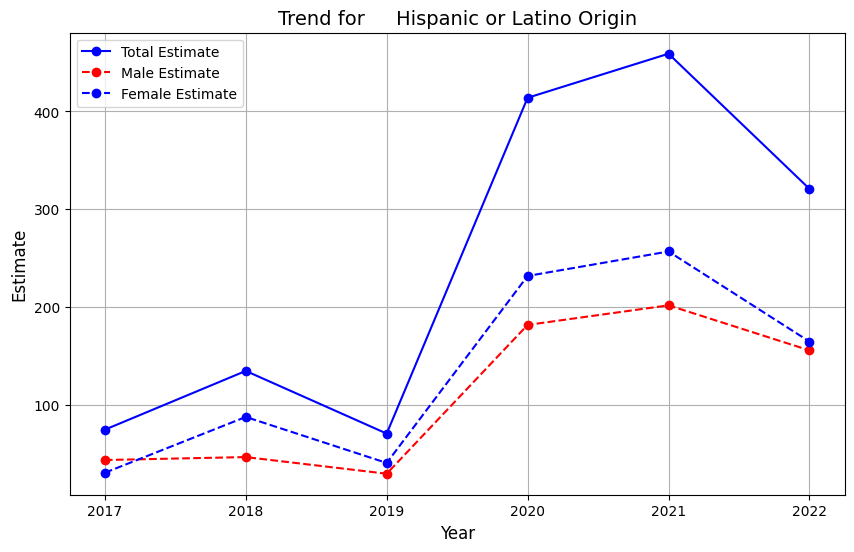

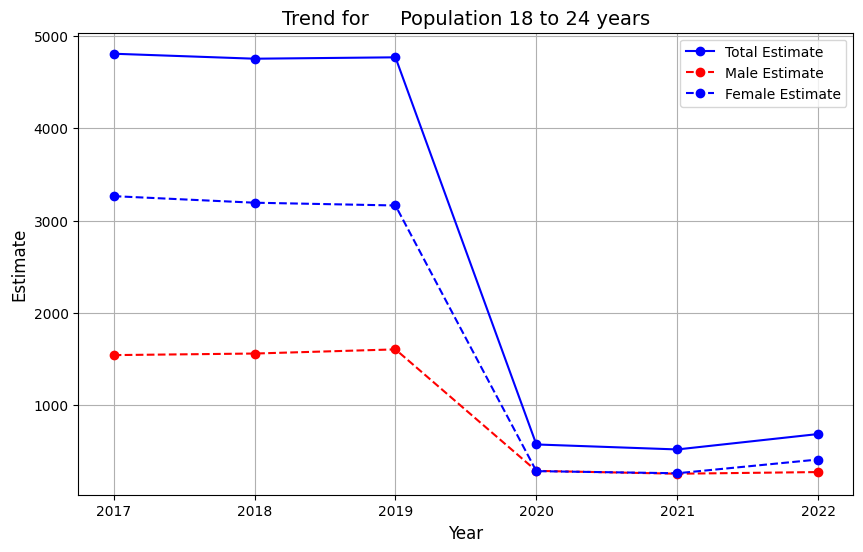

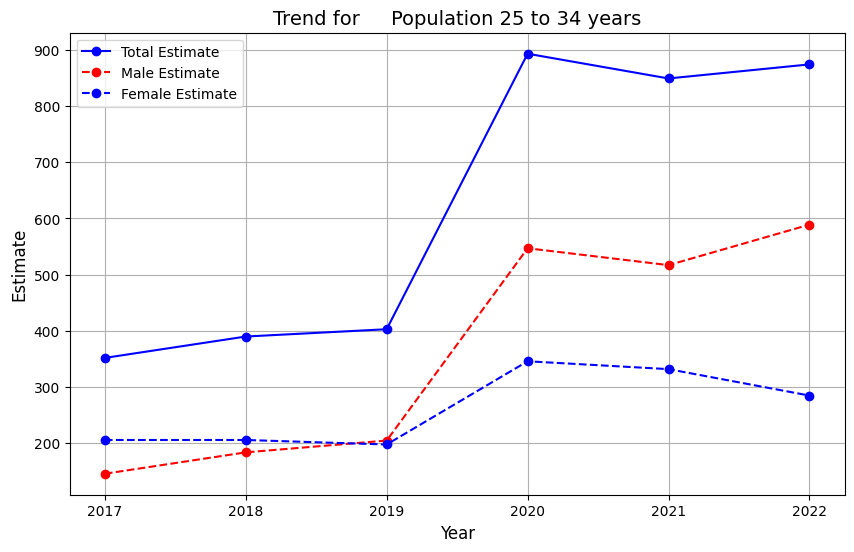

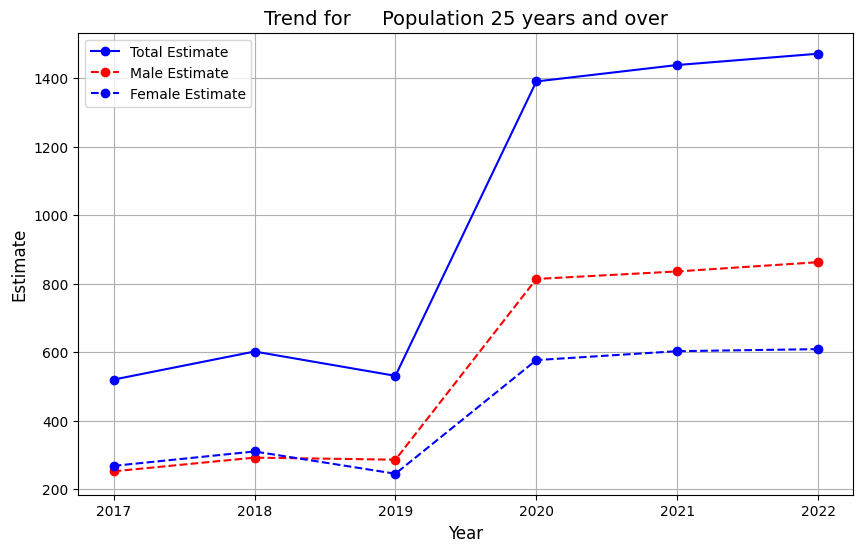

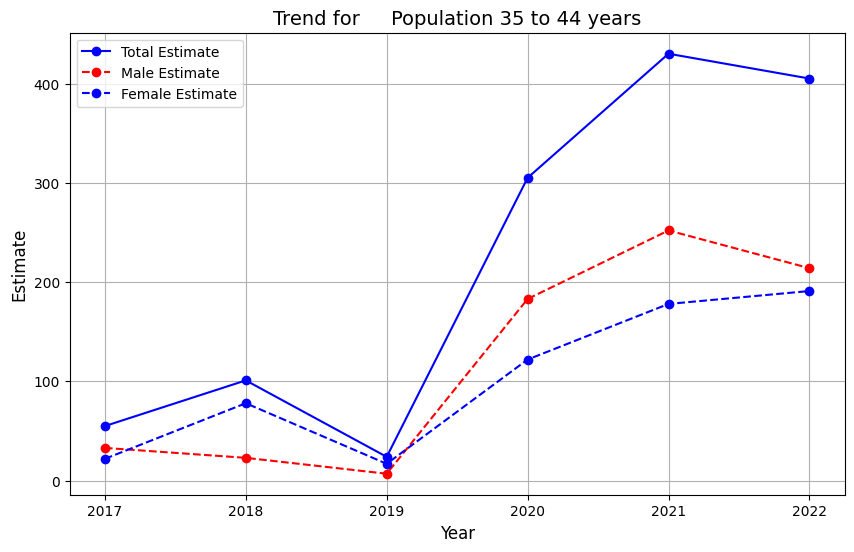

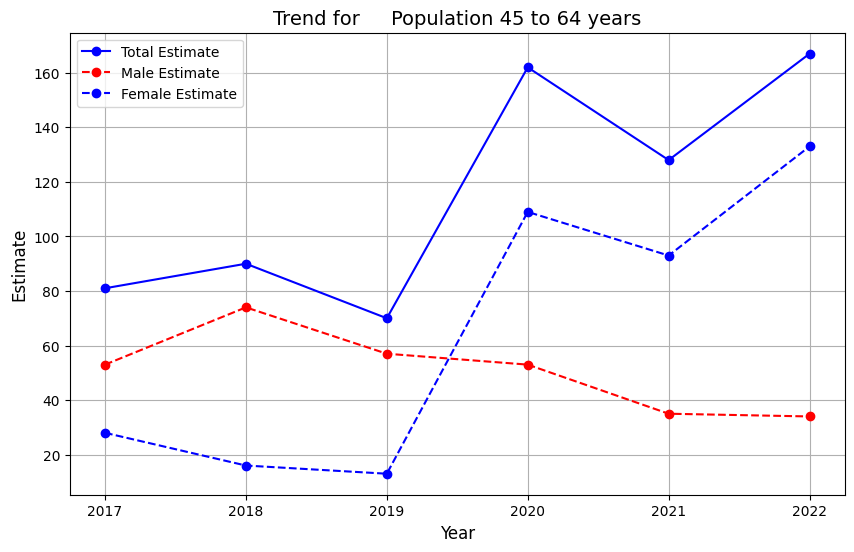

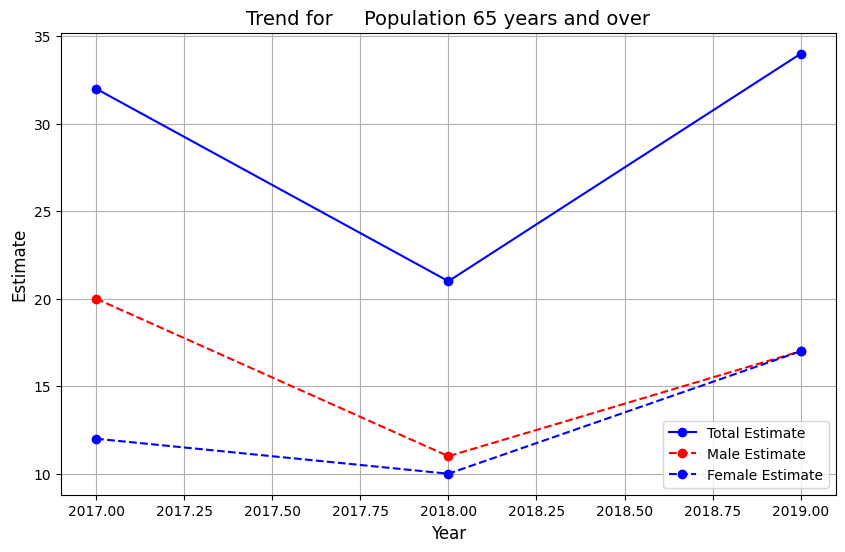

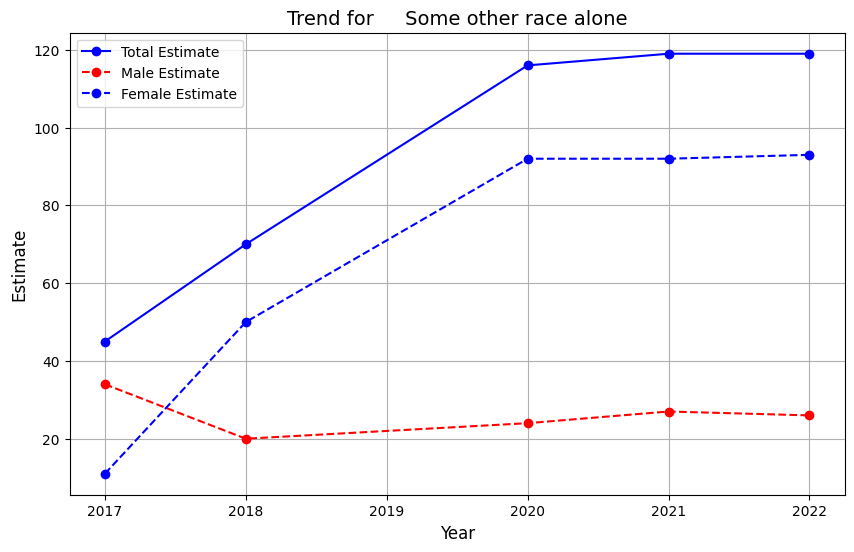

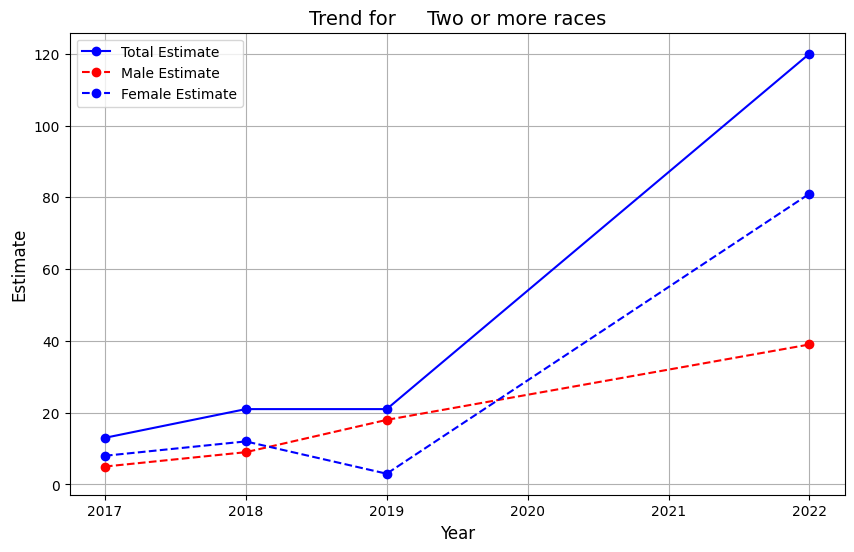

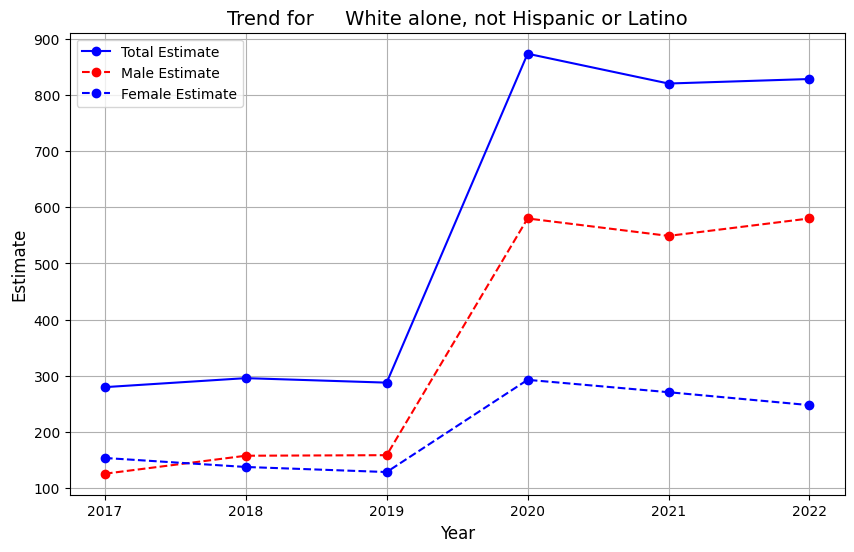

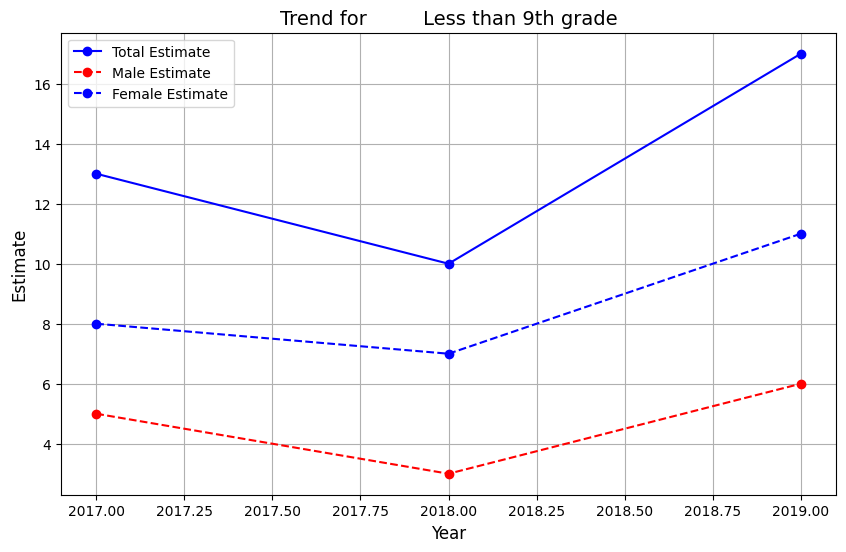

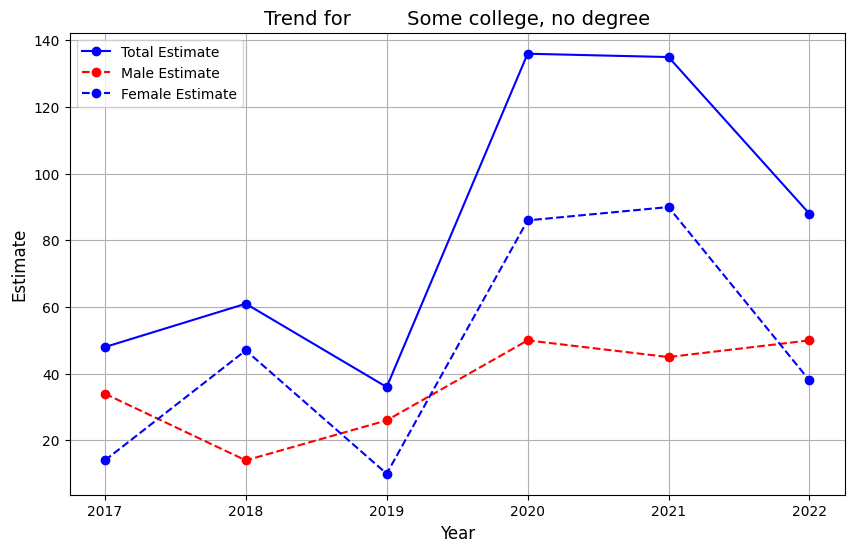

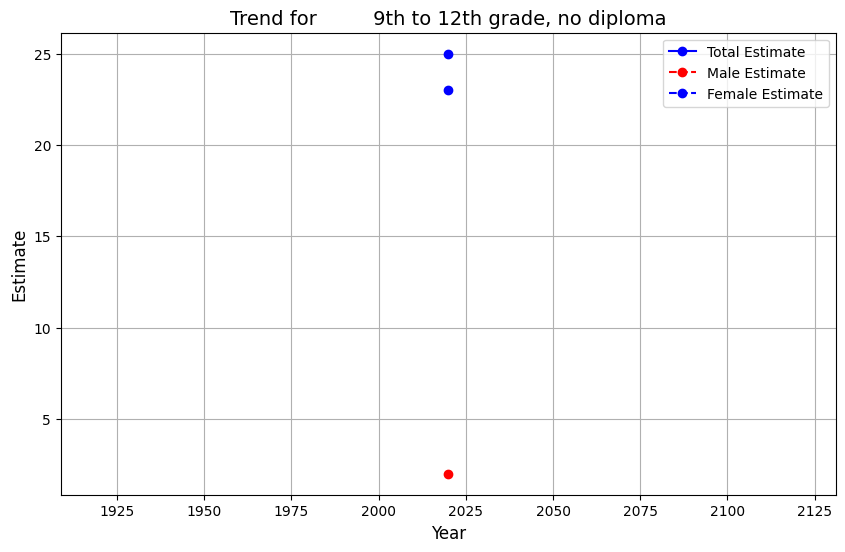

In [17]:
import matplotlib.pyplot as plt

# Get unique labels
labels = data['Label (Grouping)'].unique()

# Plot trends for each label
for label in labels:
    # Filter data for the label
    subset = data[data['Label (Grouping)'] == label]
    
    # Plot the trends
    plt.figure(figsize=(10, 6))
    plt.plot(subset['Year'], subset['Total Estimate'], label='Total Estimate', color='blue', marker='o')
    plt.plot(subset['Year'], subset['Male Estimate'], label='Male Estimate', color='red', linestyle='--', marker='o')
    plt.plot(subset['Year'], subset['Female Estimate'], label='Female Estimate', color='blue', linestyle='--', marker='o')
    
    # Add titles and labels
    plt.title(f'Trend for {label}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Estimate', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()



